## This notebook will provide the ML techniques for Credit Card Fraud detection dataset that was taken from the Kaggle dataset library (https://www.kaggle.com/mlg-ulb/creditcardfraud)
This dataset is a HIGHLY unbalanced dataset, meaning the target classes are unbalanced
Class = 0,1
0 = Non-fraud
1 = Fraud

In [2]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter

In [3]:
data = pd.read_csv("E:\\Imarticus-DSP\\Data sets\\Credit-Card-Fraud-Detection\\creditcard.csv")

In [4]:
data.head()
#31 columns of data. As we can see,all the columns starting wiith 'v' seem to be data extracted from the Principal Components of the original data.

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
#let's try to learn more about the data.
#Target variable is the 'Class' variable, where 0 means 'fraudulent' and 1 means 'genuine'
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
len(data)
#A total of 284,807 rows

284807

In [7]:
#let's check the distribution of the target variable 'Class'
Counter(data['Class'])

Counter({0: 284315, 1: 492})

We can see that the data is HIGHLY unbalanced, meaning the data in class variable of 0 is very high compared to the class variable of 1 

In [8]:
#plot a barplot to see how unbalanced the data looks graphically
import seaborn as sns

In [9]:
count_class = pd.value_counts(data['Class'])

In [10]:
print(count_class)

0    284315
1       492
Name: Class, dtype: int64


Text(0.5,0,'Class')

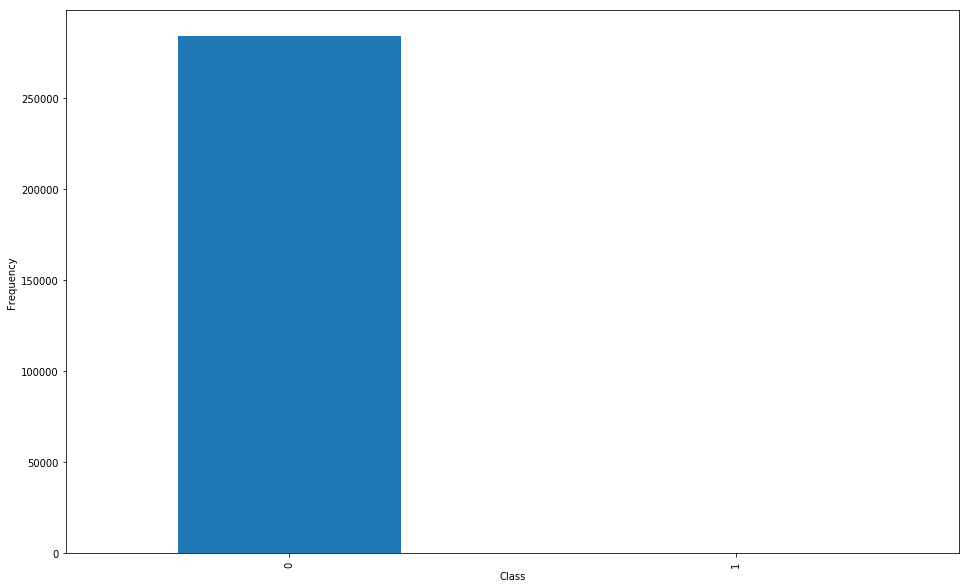

In [11]:
plt.figure(figsize=(16,10))
count_class.plot(kind='bar')
plt.ylabel('Frequency')
plt.xlabel('Class')

As seen in the graph, the target class is highly unbalanced.

In [12]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

The columns starting with 'V' are already the Principal Components. So there is nothing much that we can do with these columns.
Now, the column "Time" is the time elapsed between each transaction. Is this really an important field for us? No. It really will not have any significance in detecting whether a transaction is fraudulent or genuine. So let's drop this column.
The "Amount" column is necessary. So we shall standardise the Amount data, since all the other columns have been obtained through PCA, and PCA ALWAYS works on Standardised data.

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [14]:
data['s_Amount']=sc.fit_transform(data['Amount'].reshape(-1,1))

C:\Users\madhs\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


Drop the "Time" field and the "Amount" field. We shall use the new "s_Amount field" with scaled data for our modelling

In [15]:
data = data.drop(['Time', 'Amount'], axis=1)

In [16]:
data.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class', 's_Amount'],
      dtype='object')

Split the data into x and y variables

In [17]:
x = data.loc[:, data.columns!= 'Class']
y = data.loc[:, data.columns == 'Class']

In [18]:
x.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 's_Amount'],
      dtype='object')

In [19]:
y.columns

Index(['Class'], dtype='object')

Split the data into train and test data

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state = 62)

I will attempt to perform 3 methods of sampling to resolve this imbalanced dataset issue
1. Undersampling
2. Oversampling
3. SMOTE - Synthetic Minority Oversampling Technique 

### 1. Undersampling
The process of reducing the class instances of the MAJORITY class is called Undersampling. I will attempt to undersample the data and give a 50/50 ratio to each of the class's instances
Following are the steps for undersampling
1. Find the number of the minority class
2. Find the indices of the majority class
3. Find the indices of the minority class
4. Randomly sample the majority indices with respect to the minority numbers
5. Concat the minority indices with the indices from step 4
6. Get the balanced dataframe - This is the final undersampled data


In [22]:
#1. Find the number of the minority class
number_fraud = len(data[data['Class']==1])

In [23]:
number_non_fraud = len(data[data['Class']==0])

In [24]:
print(number_fraud)
print(number_non_fraud)

492
284315


In [25]:
#2. Find the indices of the majority class
index_non_fraud = data[data['Class']==0].index

In [26]:
#.3 Find the indices of the minority class
index_fraud = data[data['Class']==1].index

In [27]:
#4. Randomly sample the majority indices with respect to the number of minority classes
random_indices = np.random.choice(index_non_fraud, number_fraud,replace='False')

In [28]:
len(random_indices)

492

In [29]:
#5. Concat the minority indices with the indices from step 4
under_sample_indices = np.concatenate([index_fraud,random_indices])

In [30]:
under_sample_indices

array([   541,    623,   4920,   6108,   6329,   6331,   6334,   6336,
         6338,   6427,   6446,   6472,   6529,   6609,   6641,   6717,
         6719,   6734,   6774,   6820,   6870,   6882,   6899,   6903,
         6971,   8296,   8312,   8335,   8615,   8617,   8842,   8845,
         8972,   9035,   9179,   9252,   9487,   9509,  10204,  10484,
        10497,  10498,  10568,  10630,  10690,  10801,  10891,  10897,
        11343,  11710,  11841,  11880,  12070,  12108,  12261,  12369,
        14104,  14170,  14197,  14211,  14338,  15166,  15204,  15225,
        15451,  15476,  15506,  15539,  15566,  15736,  15751,  15781,
        15810,  16415,  16780,  16863,  17317,  17366,  17407,  17453,
        17480,  18466,  18472,  18773,  18809,  20198,  23308,  23422,
        26802,  27362,  27627,  27738,  27749,  29687,  30100,  30314,
        30384,  30398,  30442,  30473,  30496,  31002,  33276,  39183,
        40085,  40525,  41395,  41569,  41943,  42007,  42009,  42473,
      

In [31]:
#Get the balanced dataframe - This is the final undersampled data
under_sample_df = data.iloc[under_sample_indices]

In [32]:
under_sample_df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,s_Amount
541,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,1,-0.353229
623,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,1,1.761758
4920,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,1,0.606031
6108,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,1,-0.117342
6329,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1,-0.349231
6331,0.008430,4.137837,-6.240697,6.675732,0.768307,-3.353060,-1.631735,0.154612,-2.795892,-6.187891,...,0.364514,-0.608057,-0.539528,0.128940,1.488481,0.507963,0.735822,0.513574,1,-0.349231
6334,0.026779,4.132464,-6.560600,6.348557,1.329666,-2.513479,-1.689102,0.303253,-3.139409,-6.045468,...,0.370509,-0.576752,-0.669605,-0.759908,1.605056,0.540675,0.737040,0.496699,1,-0.349231
6336,0.329594,3.712889,-5.775935,6.078266,1.667359,-2.420168,-0.812891,0.133080,-2.214311,-5.134454,...,0.156617,-0.652450,-0.551572,-0.716522,1.415717,0.555265,0.530507,0.404474,1,-0.349231
6338,0.316459,3.809076,-5.615159,6.047445,1.554026,-2.651353,-0.746579,0.055586,-2.678679,-4.959493,...,0.208828,-0.511747,-0.583813,-0.219845,1.474753,0.491192,0.518868,0.402528,1,-0.349231
6427,0.725646,2.300894,-5.329976,4.007683,-1.730411,-1.732193,-3.968593,1.063728,-0.486097,-4.624985,...,0.589669,0.109541,0.601045,-0.364700,-1.843078,0.351909,0.594550,0.099372,1,-0.349231


In [33]:
Counter(under_sample_df['Class'])

Counter({0: 492, 1: 492})

In [34]:
under_sample_class_counts = pd.value_counts(under_sample_df['Class'])

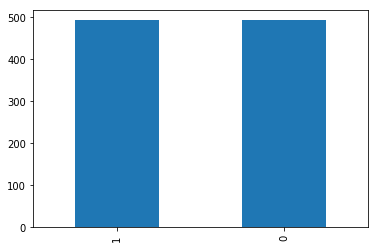

In [35]:
under_sample_class_counts.plot(kind='bar')

We can see that the classes are now equally distributed

Now, split the data into x, y, train, and test

In [36]:
x_under = under_sample_df.loc[:, under_sample_df.columns!='Class']
y_under = under_sample_df.loc[:, under_sample_df.columns=='Class']

In [37]:
x_under.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 's_Amount'],
      dtype='object')

In [38]:
y_under.columns

Index(['Class'], dtype='object')

In [39]:
x_under_train, x_under_test, y_under_train, y_under_test = train_test_split(x_under, y_under, test_size=0.25, random_state=100)

In [40]:
x_under_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,s_Amount
273457,2.047859,-0.207376,-0.556358,0.172435,-0.304297,-0.429684,-0.401866,-0.107352,1.249762,-0.247968,...,-0.172514,-0.154777,-0.261259,0.258635,-0.691858,-0.247511,-0.885973,0.063825,-0.032184,-0.349231
41943,-2.140511,4.104871,-8.996859,4.028391,-5.131359,-4.153568,-9.360095,1.922075,-4.026180,-13.691315,...,1.725578,1.854267,-0.165534,-0.339939,0.296314,1.364225,-0.518996,2.352333,1.130625,-0.350191
10891,-12.339603,4.488267,-16.587073,10.107274,-10.420199,0.130670,-15.600323,-1.157696,-5.304631,-12.938929,...,-0.085501,-2.089610,1.745315,1.376816,-0.554271,-1.610741,0.153725,1.212477,-1.869290,0.401529
64314,-1.071568,0.764998,0.398239,-0.071182,0.410966,0.440194,-0.104653,0.665072,0.362196,-0.393139,...,-0.182908,-0.224622,-0.632881,-0.195278,-1.332131,0.121653,0.341554,-0.123737,-0.023512,-0.349231
250668,-0.247522,1.218353,-0.605300,-0.390597,0.324108,-1.071154,0.590683,0.351068,-0.144194,-1.052887,...,-0.138237,-0.267044,-0.797769,0.241225,0.962286,-0.492311,0.093969,0.093313,0.024520,-0.305292


In [41]:
y_under_train.head()

,Class
273457,0
41943,1
10891,1
64314,0
250668,0


Run a Logistic Regression Classifer

In [42]:
from sklearn.linear_model import LogisticRegression
lr_under = LogisticRegression()

In [43]:
lr_under.fit(x_under_train, y_under_train)

C:\Users\madhs\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [44]:
from sklearn.metrics import accuracy_score, recall_score

In [45]:
lr_under_predict = lr_under.predict(x_under_test)

In [46]:
lr_under_accuracy = accuracy_score(lr_under_predict, y_under_test)
lr_recall = recall_score(lr_under_predict, y_under_test)

In [47]:
print(lr_under_accuracy)
print(lr_recall)

0.922764227642
0.96


We can see that the recall is 98%, which is a great number. We can say that our model is correctly classifying data as 'fraudulent' with 98% accuracy.
However, we see that accuracy is lesser than recall. This is normal, as we have undersampled our data.

### 2. Oversampling
The process of increasin the class instances of the MINORITY class is called Oversampling. 

In [48]:
fraud_sample = data[data['Class']==1].sample(number_non_fraud, replace=True)

In [49]:
len(fraud_sample)

284315

In [50]:
Counter(fraud_sample['Class'])

Counter({1: 284315})

In [51]:
#create a new dataframe containing only non-fraud data
df_fraud = data[data['Class']==0]

In [52]:
over_sample_df = pd.concat([fraud_sample,df_fraud], axis=0)

In [53]:
len(over_sample_df)

568630

In [54]:
over_sample_class_counts=pd.value_counts(over_sample_df['Class'])

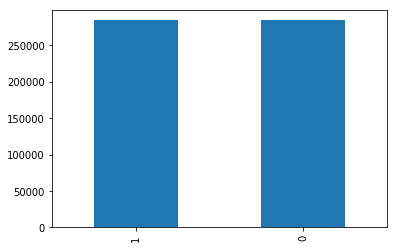

In [55]:
over_sample_class_counts.plot(kind='bar')
plt.xlabel = 'Class'
plt.ylabel = 'Frequency'

We can now see that through oversampling, the counts of both the classes in the data set are equal.
Now, we model using Logistic Regression

Split the data into x,y, train, and test

In [56]:
x_over = data.loc[:,over_sample_df.columns!='Class']
y_over = data.loc[:,over_sample_df.columns=='Class']

In [57]:
x.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 's_Amount'],
      dtype='object')

In [58]:
y.columns

Index(['Class'], dtype='object')

In [59]:
x_over_train, x_over_test, y_over_train, y_over_test = train_test_split(x_over, y_over, test_size = 0.25)

In [60]:
lr_over = LogisticRegression()
lr_over.fit(x_over_train,y_over_train)
lr_over_predict=lr_over.predict(x_over_test)

C:\Users\madhs\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [61]:
lr_over_accuracy = accuracy_score(lr_over_predict, y_over_test)
lr_over_recall = recall_score(lr_over_predict, y_over_test)
print(lr_over_accuracy)
print(lr_over_recall)

0.999367995281
0.887640449438


We can see that the accuracy is VERY high, but the recall is very low compared to what we saw for the undersampling recall. This is because oversampling causes OVERFITTING, as the data is multiplicated.

### 3. SMOTE - Syntetic Minority Over Sampling Technique

In [84]:
import imblearn
from imblearn.over_sampling import SMOTE

The right way to work on imbalanced data and SMOTE is to oversample only on the training data, and leave the test data unseen

1. Split the training data further into train and validation data
 1. original test data = x_test, y_test
 2. original train_data = x_train, y_train
2. I will further split x_train, y_train to x_val, y_val, x_train_new, y_train_new
3. I will build the models on x_val and y_val, and check the model for performance on x_train_new, y_train_new
4. Finally I will check the performace of the model on the unseen x_test, y_test

In [85]:
x_val, x_train_new, y_val,y_train_new = train_test_split(x_train, y_train, test_size = 0.25, random_state=12)

In [86]:
sm = SMOTE()

Here SMOTE.fit_sample gives me the resampled data i.e the oversampled data

In [89]:
x_train_res, y_train_res = sm.fit_sample(x_val, y_val)

C:\Users\madhs\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [108]:
len(x_train_res)

319842

In [110]:
len(y_train_res)

319842

In [114]:
Counter(y_train_res)

Counter({0: 159921, 1: 159921})

As seen above, the result of SMOTE gives us equal distribution of the 2 target classes.

In [91]:
lr_smote = LogisticRegression()
lr_smote.fit(x_train_res, y_train_res)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [93]:
#predict on the train data
lr_smote_predict = lr_smote.predict(x_train_new)

In [94]:
#print accuracy and recall on train data
print(accuracy_score(lr_smote_predict,y_train_new))
print(recall_score(lr_smote_predict,y_train_new))

0.970113478896
0.0507765830346


In [96]:
#predict on the test data
lr_smote_predict_test = lr_smote.predict(x_test)

In [97]:
print(accuracy_score(lr_smote_predict_test,y_test))
print(recall_score(lr_smote_predict_test,y_test))

0.969916575377
0.0470008952551


We can see that the recall score for both the train data and the 'unseen' test data are almost similar. This means that we have built a good model using SMOTE

Using Random Forest Classifer

In [99]:
from sklearn.ensemble import RandomForestClassifier

In [100]:
rf = RandomForestClassifier()

In [101]:
rf.fit(x_train_res, y_train_res)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [104]:
rf_smote_predict = rf.predict(x_train_new)
rf_smote_predict_test = rf.predict(x_test)

Check accuracy and recall on the train data

In [106]:
print(accuracy_score(rf_smote_predict,y_train_new))
print(recall_score(rf_smote_predict,y_train_new))

0.999363319726
0.808510638298


Check accuracy and recall on the unseen test data

In [107]:
print(accuracy_score(rf_smote_predict_test,y_test))
print(recall_score(rf_smote_predict_test,y_test))

0.999438218028
0.854545454545


We can see that Random Forest performs MUCH BETTER in predicting the frauds in our dataset with the accuracy being 85% on the test data. Also, since the accuracy on the unseen test data is close to the recall of the train data, this model would perform well un production (as in prod, our model will be predicting on unseen test data)'